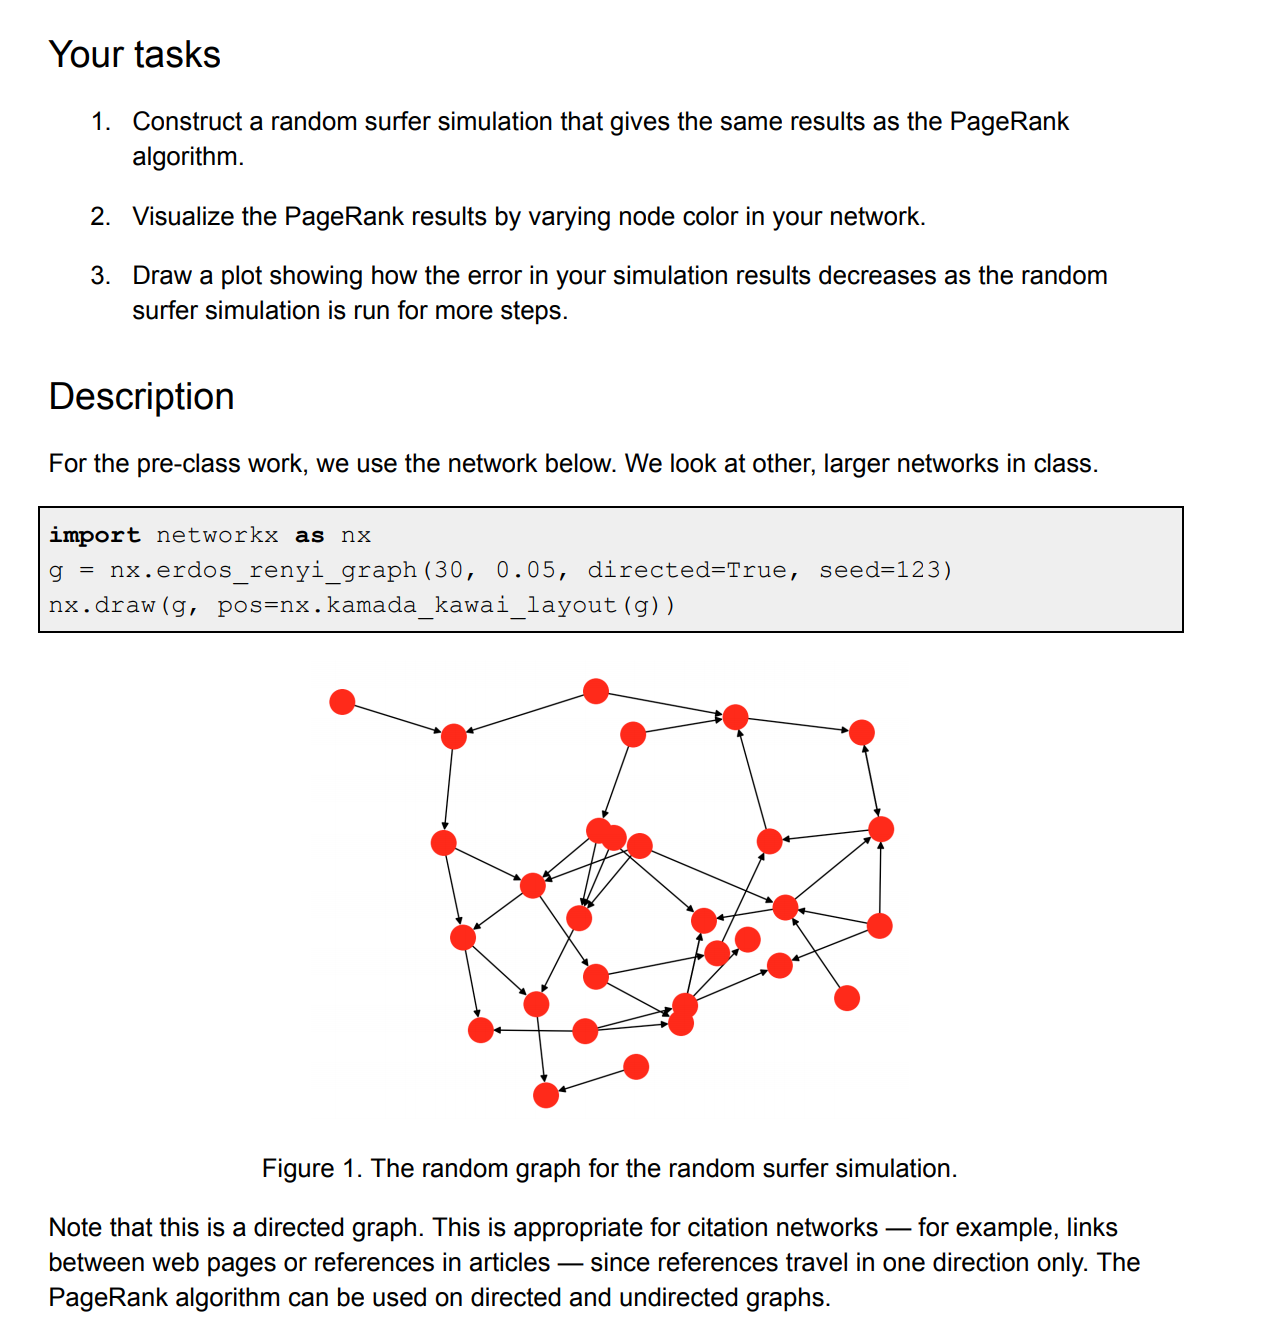

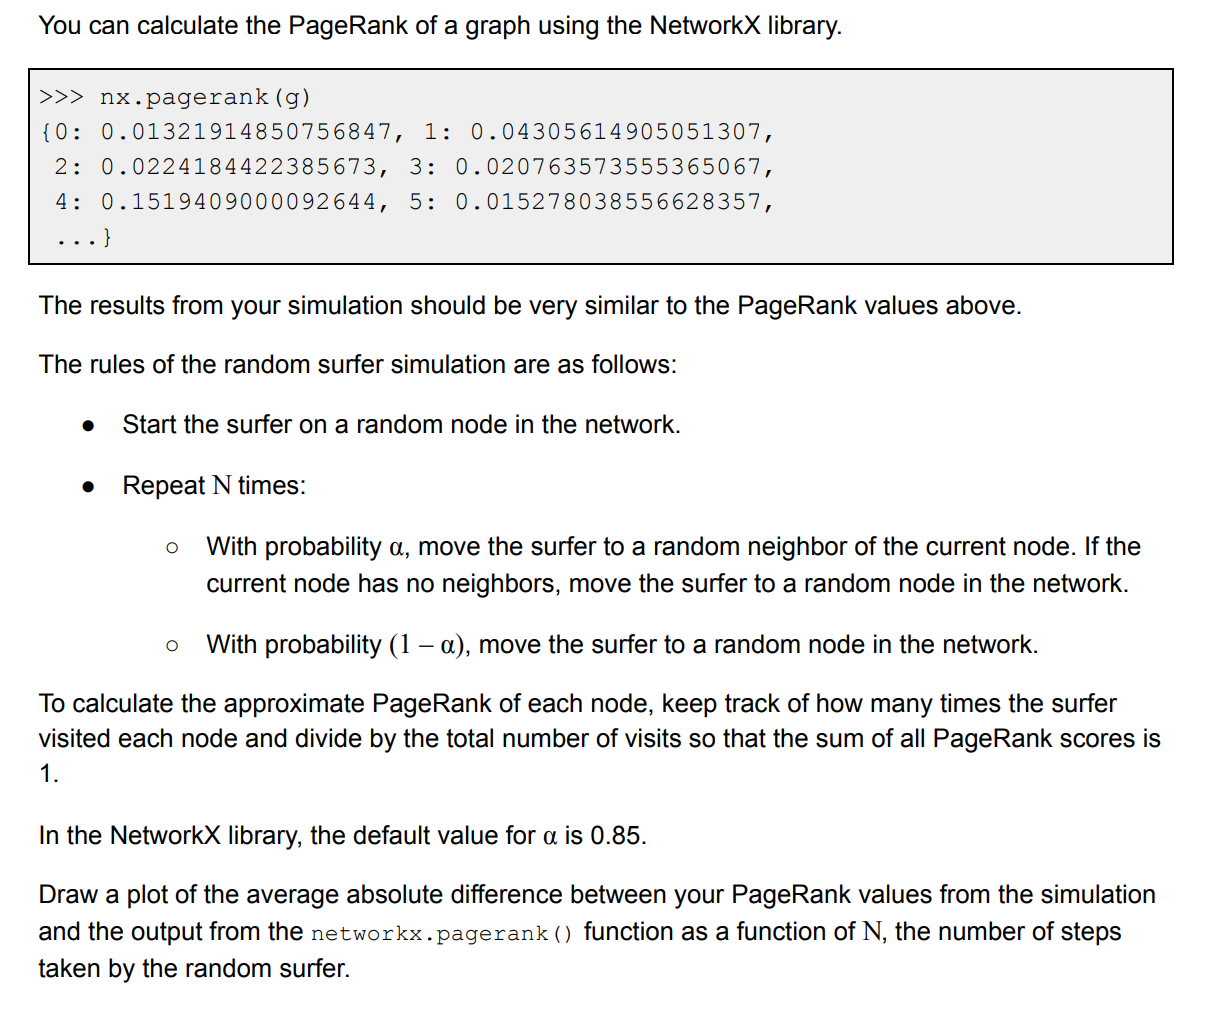

In [2]:
import networkx as nx
g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g))

In [3]:
#nx.pagerank(g)
import random as rd
import numpy as np

def simulate_page_rank(G, n, alpha):
    '''
    G: Simulate the PageRank algorithm on graph G,
    
    n: steps of a random walk on G
    
    alpha: walk to random neighbour with probability alpha;
    With probability (1-a), teleport to random node in network
    
    Returns dictionary with page rank of each node in G
    '''
    #Array to count the visits to each node
    node_visits = np.zeros(G.number_of_nodes())

    #Start the surfer on a random node in the network.
    surfer_page = rd.choice(list(g.nodes))
    node_visits[surfer_page] += 1
    
    #Repeat n times
    for i in range(n):
        
        #With probability alpha, move the surfer to a random neighbor of the current node
        if rd.random() < alpha:
            neighbors = list(g.neighbors(surfer_page))
            
            if len(neighbors) != 0:
                surfer_page = rd.choice(neighbors)
                
            #If the current node has no neighbors, move the surfer to a random node in the network
            else:
                surfer_page = rd.choice(list(g.nodes))
        
        #With probability (1 –  α) , move the surfer to a random node in the network
        else:
            surfer_page = rd.choice(list(g.nodes))
        
        #Store node visit
        node_visits[surfer_page] += 1
        
    #Dictionary of same specs as nx.pagerank
    return {x:node_visits[x]/n for x in list(g.nodes)}

# Visualize the PageRank results by varying node color in your network

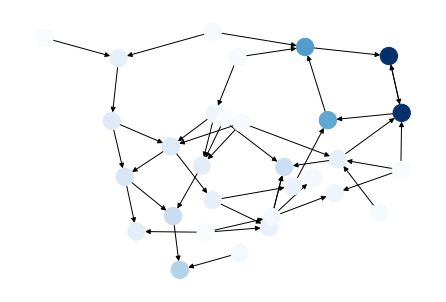

In [4]:
simulated_page_ranks = simulate_page_rank(g, 10000, 0.85)

#We use the node_color argument to color the nodes with intensity proportional to their pagerank
values = list(simulated_page_ranks.values())
nx.draw(g, pos=nx.kamada_kawai_layout(g), node_color=values, cmap="Blues")

We can see that nodes 4 and 22 have the highest PageRank.

# How the error in the simulation results decreases as the randomsurfer simulation is run for more steps.

In [5]:
def total_absolute_keywise_error(target, estimate):
    '''
    Gets target dictionary with same keys as estimate dictionary
    returns the sum of the absolute keywise differences between 
    target and estimate dictionaries
    '''
    
    return sum([abs(target[x]-estimate[x]) for x in target.keys()])

def compare_page_rank_to_sim(G):
    
    n_simulations = list(range(10, 10000, 200))
    errors = []
    
    #Get actual page rank of graph
    pagerank = nx.pagerank(G)
    
    for n in n_simulations:
        
        temp = []
        for _ in range(10):
            sim = simulate_page_rank(G, n, 0.85)
            temp.append(total_absolute_keywise_error(pagerank, sim))
            
        errors.append(np.mean(temp))
    
    return n_simulations, errors

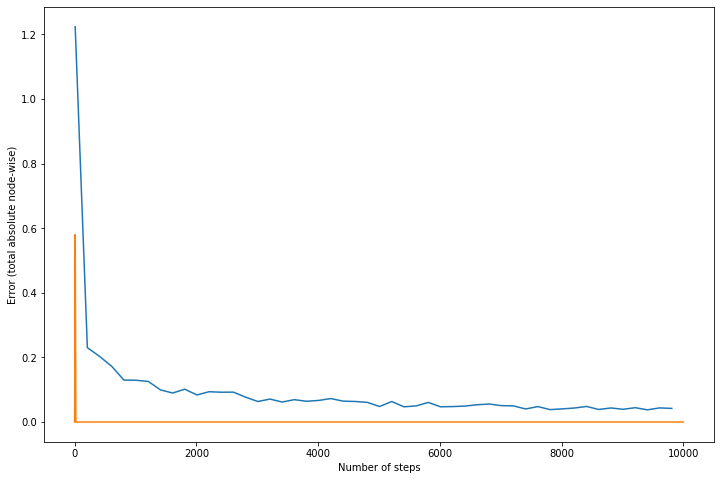

In [19]:
import matplotlib.pyplot as plt

n_simulations, errors = compare_page_rank_to_sim(g)

import scipy.stats as sts
lambda_ = len(n_simulations)/ sum(errors)
x = np.linspace(1, 10000, 1000)
expon = sts.expon(lambda_)

plt.figure(figsize=(12,8))
plt.plot(n_simulations, errors)
plt.plot(x, expon.pdf(x))
plt.xlabel("Number of steps")
plt.ylabel("Error (total absolute node-wise)")
plt.show()

As with most simulations, the error tends to decrease, subject to diminishing returns, with the number of steps it is run. In fact, the scaling with the number of steps looks exponential. To test this hypothesis, we plot it on a log-log plot. If it is exponential, it should be an straight line on the log-log plot.

Further, we see that the error is small, approximately 3% when the number of steps is ~10000. 

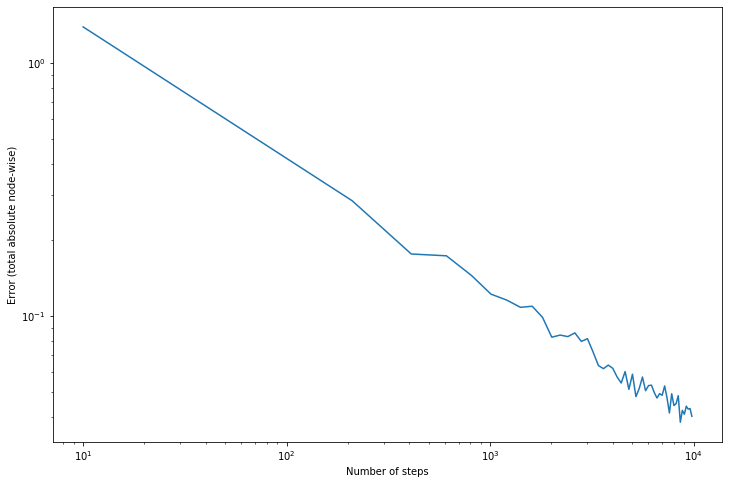

In [23]:
n_simulations, errors = compare_page_rank_to_sim(g)
plt.figure(figsize=(12,8))
plt.loglog(n_simulations, errors)
plt.xlabel("Number of steps")
plt.ylabel("Error (total absolute node-wise)")
plt.show()

It is indeed a straight line, up to variance, meaning the marginal returns to increasing the number of steps follows decrease exponentially.